#### Import modules

In [ ]:
# !pip install -r requirements_netflix_jung.txt
# !pip install -r requirements_netflix_jung_lite.txt

# !pip list
# !pip install pandas==1.1.0

In [ ]:
# import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import re
import string
import os
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D 
from collections import defaultdict
from sklearn.model_selection import train_test_split

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import models
from gensim.test.utils import datapath
from gensim.test.utils import common_texts, get_tmpfile

# spacy for lemmatization
import spacy

import os.path
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text
from sklearn.manifold import TSNE
from transformers import BertTokenizer, TFBertModel
# from bert_embedding import BertEmbedding
import matplotlib.cm as cm
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
# from adjustText import adjust_text
# import umap
# import umap.umap_ as umap
# import umap.plot

#### Import the dominant topics based on the chosen model

In [ ]:
mallet_lda_df = pd.read_pickle('lda_mallet_model/mallet_lda_df.pkl')
df = pd.read_pickle('raw_data/netflix.pkl')
df = pd.concat([mallet_lda_df.reset_index(drop=True), df.loc[:, ['star_rating', 'helpful_votes', 'total_votes', 'review']].reset_index(drop=True)], axis = 1)

#### Check the topic labels(which are to be the target variables)

In [ ]:
topic_dict = {0.: "Platform/Device", 1.: "User Experience", 2.: "Value", 3.: "Service", 4.: "Trouble-shooting", 5.:"Shows"}

In [ ]:
representative_topics = df.groupby('Dominant_Topic').max().loc[:, "Perc_Contribution"]
pairs = list(zip(representative_topics.index, representative_topics.values))
representative_topics = df.loc[df.apply(lambda x: (x.Dominant_Topic, x.Perc_Contribution) in pairs, axis = 1),:].sort_values('Dominant_Topic')
representative_topics.loc[:, 'Dominant_Topic'] = ['0. Platform/Device', '1. User', '2. Value', '3. Service', '4. Trouble-shooting', '5. Shows']
representative_topics.loc[:, 'review'] = representative_topics.loc[:, 'review'].map(lambda x: x[:500])

In [ ]:
representative_topics.style.set_properties(subset=['review'], **{'width': '400px'})

,Dominant_Topic,Perc_Contribution,Keywords,Text,star_rating,helpful_votes,total_votes,review
3633,0. Platform/Device,0.893600,"time, work, app, fire, love, phone, movie, tablet, download, kindle","['people', 'internet', 'buffer', 'much_movie', 'like_good', 'app', 'movie', 'movie', 'couch', 'bed', 'want_watch', 'watch_movie', 'like_fact', 'sure_get', 'work', 'time', 'long_load', 'time', 'customer_year', 'kindle', 'pod', 'wifi', 'mcdonald']",4,2,3,very good I like this app overall but I don't like that their can only be two people on it at a time. It would be better if you could use it without Internet. Sometimes it takes a long to to load or buffer an it makes you shows blurry. There is not as much movies and shows that some other thing like netflix have. Netflix is very good app for sitting down with you family and watching a movie or being alone and watching a show or movie on the couch or even in your bed. Netflix has a lot of great m
10412,1. User,0.923200,"movie, kid, profile, account, selection, family, child, shows_movie, site, watch","['content', 'availability', 'example', 'child', 'age', 'selection', 'child', 'family', 'content_time', 'kid', 'access', 'horror', 'wish', 'setting', 'viewing', 'genre', 'parent']",4,10,12,"NETFLIX is great! I really enjoy using NETFLIX. It is user-friendly, very convenient and inexpensive.The one thing I would change about NETFLIX is the content availability, for example, my children, ages 7 and 8 love to watch movies on NETFLIX and they do have a great selection of children/family content, but at the same time, my kids have access to R-rated, gay-lesbian, horror, etc. I wish they had a setting which I could prevent them from viewing those genres. For now, I just cl"
6378,2. Value,0.923500,"movie, program, cable, tv, show, selection, love, service, year, choice","['fee', 'considering', 'cost', 'movie_theater', 'ticket', 'bargain', 'amount', 'commercial', 'movie', 'closed_caption', 'home', 'br', 'drive', 'theater', 'long_line', 'could_ask']",4,1,2,"It's worth the monthly fee! Considering the cost of a movie theater ticket, what a bargain! I can enjoy a movie without a considerable amount of commercials, if I am interruped, I can pause the movie and if I am hard of hearing, most movies have closed caption! I caneven make my own popcorn at home! I can also just stop the movie if it think it's something not of my liking, and start another!!I don't have to drive to and from the theater, no long lines, etc. and if you happen to"
6386,3. Service,0.943300,"service, streaming, time, product, year, price, customer, movie, film, option","['app', 'arrogance', 'application', 'team', 'market', 'research', 'etc', 'film', 'matter', 'team', 'people', 'option', 'sheep', 'navigation', 'ring', 'option', 'amazon_prime', 'service', 'end', 'credit', 'oblivion', 'prompt']",1,21,29,"Netflix and the Arrogant App The arrogance of this application is amazing. I am sure some ""team"" thought they new enough, did enough market research, etc. to believe the credits to a film don't matter. The ""team"" also apparently believes giving people fewer options is better because it's all just too advanced for us sheep to understand. I now have to scroll more, hit the back button more, use the navigation ring on Fire TV remote more, and I don't enjoy Netflix as much as I us"
11845,4. Trouble-shooting,0.934800,"app, video, problem, issue, update, time, device, fire, work, fix","['browsing', 'bit', 'browsing', 'bit', 'guess', 'task', 'thread', 'background', 'developer', 'issue', 'priority', 'fix', 'experience', 'browsing', 'available_movie', 'second', 'drag', 'request', 'stuff']",3,0,0,"good, browsing ui can be a bit too sluggish Streaming works fairly well. I've noticed that the browsing UI can be a bit sluggish. My guess is that some tasks are being handled in the UI thread, which should actually be delegated to a background thread (I'm a professional developer). This issue should be a high priority fix -- it really detracts fro

#### Start Modeling BERT
#### Code from [ktrain](https://github.com/amaiya/ktrain/)
Using the topic labels as the target label, use BERT to classify the unseen data, and compare the results with the LDA model's prediction on the unseen data to see which model classified the unseen review better.
<br><br>
[Hugging Face](https://github.com/huggingface/transformers) may be a common package to use.

#### In the training set, exclude examples that have 1/6 chance in the dominant topic. Because that means the dominant topic is just as likely as the other five topics.

In [ ]:
mask = df.Perc_Contribution > 0.1667
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df.loc[mask, ['review', 'Dominant_Topic']],
                                                                   text_column = 'review',
                                                                   label_columns = 'Dominant_Topic',
                                                                   maxlen=512,
                                                                   preprocess_mode='bert')

/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:616: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  warnings.warn('class_names implies classification but targets array contains float(s) instead of integers or strings')
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:616: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  warnings.warn('class_names implies classification but targets array contains float(s) instead of integers or strings')


['Dominant_Topic_0.0', 'Dominant_Topic_1.0', 'Dominant_Topic_2.0', 'Dominant_Topic_3.0', 'Dominant_Topic_4.0', 'Dominant_Topic_5.0']
      Dominant_Topic_0.0  ...  Dominant_Topic_5.0
1831                 0.0  ...                 1.0
9494                 0.0  ...                 0.0
1311                 0.0  ...                 0.0
1386                 1.0  ...                 0.0
2632                 0.0  ...                 0.0

[5 rows x 6 columns]
['Dominant_Topic_0.0', 'Dominant_Topic_1.0', 'Dominant_Topic_2.0', 'Dominant_Topic_3.0', 'Dominant_Topic_4.0', 'Dominant_Topic_5.0']
       Dominant_Topic_0.0  ...  Dominant_Topic_5.0
3312                  0.0  ...                 0.0
11435                 1.0  ...                 0.0
1693                  1.0  ...                 0.0
7560                  1.0  ...                 0.0
5847                  0.0  ...                 1.0

[5 rows x 6 columns]
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[████████████████

Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
# %%time
# model = text.text_classifier(name='bert',
#                              train_data=(x_train, y_train),
#                              preproc=preproc)

In [ ]:
# %%time
# learner = ktrain.get_learner(model=model,
#                              train_data=(x_train, y_train),
#                              val_data=(x_test, y_test),
#                              batch_size=1)

In [ ]:
# %%time
# learner.fit_onecycle(lr=2e-5, epochs=1)

In [ ]:
# %%time
# learner.fit_onecycle(2e-5, 2)

In [ ]:
# %%time
# learner.fit_onecycle(2e-5, 1)

In [ ]:
# %%time
# # save model and Preprocessor instance after partially training
# # ktrain.get_predictor(model, preproc).save('bert_model')
# ktrain.get_predictor(model, preproc).save('bert_model_v0271')

In [ ]:
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()

In [ ]:
from google.colab import drive
# drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
# drive_service = build('drive', 'v3')

# def save_file_to_drive(name, path):
  
#   file_metadata = {
#       'name': name,
#       'mimeType': 'application/octet-stream'
#       }
#   media = MediaFileUpload(path, mimetype='application/octet-stream', resumable=True)

#   created = drive_service.files().create(body=file_metadata,
#                                 media_body=media,
#                                 fields='id').execute()

#   print('File ID: {}'.format(created.get('id')))

#   return created


In [ ]:
# save_file_to_drive('/', '/content/bert_model_v0271/tf_model.h5')

In [ ]:
# %%time
# learner.fit_onecycle(2e-5, 2)

In [ ]:
# %%time
# learner.fit_onecycle(2e-5, 1)

In [ ]:
# %%time
# # # reload Predictor and extract model
# model = ktrain.load_predictor('bert_model_v0271').model

# # # re-instantiate Learner and continue training
# # learner = ktrain.get_learner(model=model,
# #                              train_data=(x_train, y_train),
# #                              val_data=(x_test, y_test),
# #                              batch_size=1)
# # learner.fit_onecycle(2e-5, 1)

In [ ]:
# %%time
# # save model and Preprocessor instance after partially training
# ktrain.get_predictor(model, preproc).save('bert_model_v0271_part2')

### Predicting Topic with unseen text(validation set)

In [ ]:
BERT_preds, BERT_proba = pd.read_pickle('prediction/BERT_preds.pkl'), pd.read_pickle('prediction/BERT_proba.pkl')
LDA_preds, LDA_proba = pd.read_pickle('prediction/LDA_preds.pkl'), pd.read_pickle('prediction/LDA_proba.pkl')

In [ ]:
type(BERT_preds)
# BERT_proba
# LDA_preds
# LDA_proba

list

In [ ]:
# Import hold_out validation dataset
df = pd.read_pickle('raw_data/netflix_val.pkl')
reviews = df.review.values.tolist()

In [ ]:
# reload Predictor and extract model
# model = ktrain.load_predictor('bert_model').model
model = ktrain.load_predictor('/content/gdrive/MyDrive/bert_model').model


# # re-instantiate Learner
learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=1)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
%time predicted_topics = predictor.predict(reviews)

CPU times: user 35.5 s, sys: 6.14 s, total: 41.7 s
Wall time: 5min 24s


In [ ]:
BERT_preds = [float(topic.replace('Dominant_Topic_', '')) for topic in predicted_topics]

In [ ]:
%time BERT_proba = predictor.predict_proba(reviews)

CPU times: user 35.4 s, sys: 6.01 s, total: 41.4 s
Wall time: 4min 52s


In [ ]:
# predictor = ktrain.get_predictor(learner.model, preproc)

# %time predicted_topics = predictor.predict(reviews)
# # BERT_preds = [float(topic) for topic in predicted_topics] # error convert str to float
# BERT_preds = [float(topic.replace('Dominant_Topic_', '')) for topic in predicted_topics]

# %time BERT_proba = predictor.predict_proba(reviews)

In [ ]:
pd.to_pickle(BERT_preds, 'prediction_20210725/BERT_preds.pkl')
pd.to_pickle(BERT_proba, 'prediction_20210725/BERT_proba.pkl')

#### Compare with LDA model

Only 43% of the predicted labels are the same..

In [ ]:
# mask = LDA_preds == np.array(BERT_preds)
# sum(mask) / len(BERT_preds)

0.4322775744071303

In [ ]:
mask = LDA_preds == np.array(BERT_preds)
sum(mask) / len(BERT_preds)

0.4262295081967213

### Predicting Topic with ad-hoc text

In [ ]:
new_text = "I think I really like the app. Thanks for making this useful app."

In [ ]:
model = ktrain.load_predictor('/content/gdrive/MyDrive/bert_model').model
preproc = ktrain.load_predictor('/content/gdrive/MyDrive/bert_model').preproc
predictor = ktrain.get_predictor(model, preproc)

In [ ]:
predictor.predict(new_text, return_proba=True)

array([0.20511918, 0.13379347, 0.1958028 , 0.16515261, 0.07823506,
       0.22189684], dtype=float32)

In [ ]:
percentages = predictor.predict(new_text, return_proba=True)
topics = ["Platform/Device", "User Experience", "Value", "Service", "Trouble-shooting", "Shows"]
indices = np.argsort(percentages)[::-1]
[topics[index] for index in indices]

['Shows',
 'Platform/Device',
 'Value',
 'Service',
 'User Experience',
 'Trouble-shooting']

In [ ]:
[100*np.round(percentages[index], 3) for index in indices]

[22.200000286102295,
 20.499999821186066,
 19.599999487400055,
 16.500000655651093,
 13.40000033378601,
 7.800000160932541]

### Plotting the word embeddings

There's 9149 documents with 512 dimensions for embedding in training set and 6283 documents with 512 dimensions for embedding in validation set.

### TSNE
According to the [source code](https://github.com/amaiya/ktrain/blob/master/ktrain/text/preprocessor.py), BERTPreprocessor's preprocess function returns (preprocessed x, preprocessed y)

In [ ]:
preproc_val = preproc.preprocess(reviews)
preprocessed_X = preproc_val[0]
tsne = TSNE(n_components=3, random_state = 0)

In [ ]:
%time tsne_3d_coordinates = tsne.fit_transform(preprocessed_X)

CPU times: user 8min 48s, sys: 0 ns, total: 8min 48s
Wall time: 4min 42s


#### Representative embeddings with 99.5% probability

In [ ]:
print(BERT_proba.argmax(axis=0))
print(BERT_proba.max(axis=0).round(5))
# Platform/Device, User, Value, Service, Trouble-shooting, Shows

[4297  162 1076 5476 1051 1385]
[0.73564 0.94029 0.88601 0.75868 0.90122 0.99642]


In [ ]:
df_reset_index = df.reset_index(drop=True)
representative_reviews = df_reset_index.iloc[BERT_proba.argmax(axis=0), :]['review'].values

### BERT visualization

In [ ]:
total_indices = np.array(range(len(BERT_proba)))
major_docs = total_indices[BERT_proba.max(axis=1) >= 0.99]
x_coords, y_coords, z_coords = tsne_3d_coordinates[major_docs,0], tsne_3d_coordinates[major_docs,1], tsne_3d_coordinates[major_docs, 2]
len(major_docs)

184

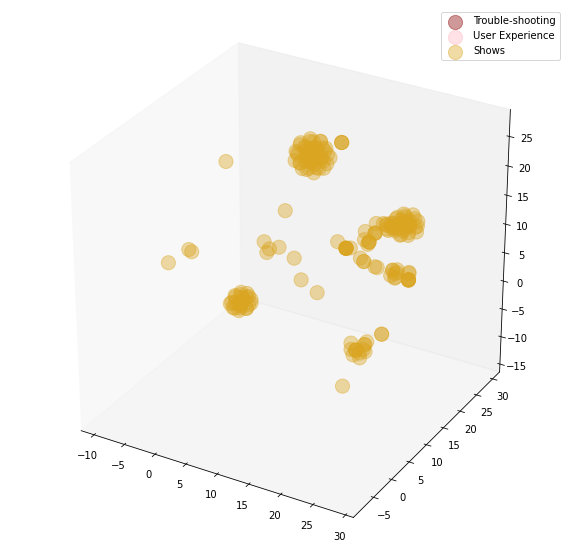

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
colors = ['green', 'lightpink', 'gray', 'dodgerblue', 'darkred', 'goldenrod']
for label in [4, 1, 5]:
    mask = np.array(BERT_preds)[major_docs] == label
    ax.scatter3D(x_coords[mask], y_coords[mask], z_coords[mask], c=colors[label], label=topic_dict[label], alpha=.4, marker = 'o', s=200)

# for label in [0, 2, 3]:
#     mask = np.array(BERT_preds)[major_docs] == label
#     ax.scatter3D(x_coords[mask], y_coords[mask], z_coords[mask], facecolor=(1,1,1,0), edgecolor=colors[label],alpha=1, label=topic_dict[label], marker = '^', s=10)

ax.grid(False)
ax.legend();
# plt.savefig('images/{}'.format("bert_tsne"), dpi=200, transparent=True, bbox_inches = "tight");

In [ ]:
print(matplotlib.colors.to_rgba("green"), matplotlib.colors.cnames["lightpink"], matplotlib.colors.cnames["gray"],
      matplotlib.colors.cnames["dodgerblue"], matplotlib.colors.cnames["darkred"], matplotlib.colors.cnames["goldenrod"])

(0.0, 0.5019607843137255, 0.0, 1.0) #FFB6C1 #808080 #1E90FF #8B0000 #DAA520


### Wordcloud

In [ ]:
reviews_df = pd.concat([pd.Series(reviews), pd.Series(BERT_preds)], axis = 1)
reviews_df.columns = ['review', 'pred']

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

tokenized_text = []
for review in reviews_df.loc[:,'review']:
    tokenized_text.append(tokenizer.tokenize(review))

In [ ]:
def one_string(texts, boolean_mask):
    thing = ' '.join([' '.join(item) for item in [row for row, boolean in zip(texts, boolean_mask) if boolean]])
    thing = re.sub(r'[ ]{2,}', ' ', thing)
    return re.sub(r'#', '', thing)

def create_wordcloud(img_directory, id, contour_width=3, contour_color='green', background_color="white"):
    topic_ids = np.array(reviews_df.pred)
    mask = np.array(Image.open(img_directory))
    stop_words = set(stopwords.words('english')) | {'<','>',"'",'-','/',',','!','.','br','&',';','?',')','#','##s','##ing','le','ha','wa',
                                                'would','great','watch','stars','netflix','app','like','tv','five','good','love','one','show','star', 'stars'
                                                'shows','time','kind','movie','movies','##le','watching','want','get','really','could','four', 'also', 'to', 'it', 'even'}
    # Removed words that appeared in all or most topics
    wc = WordCloud(background_color=background_color, max_words=15, mask=mask, stopwords=stop_words,
                   max_font_size=100, random_state=40, contour_width=contour_width, contour_color=contour_color)
    wc.generate(one_string(tokenized_text, topic_ids == id))
    return wc

In [ ]:
# plt.figure(figsize=(10,6))
# plt.title('Trouble-shooting(Video-related)', fontsize=20); plt.imshow(create_wordcloud('images/problem.png', 4,contour_color='darkred'), interpolation='spline36'); plt.axis("off");
# plt.savefig('images/{}'.format("bert_trouble"), dpi=200, transparent=True, bbox_inches = "tight")
# plt.figure(figsize=(10,6))
# plt.title('User Experience', fontsize=20); plt.imshow(create_wordcloud('images/family.png', 1,contour_color='lightpink'), interpolation='spline36'); plt.axis("off");
# plt.savefig('images/{}'.format("bert_user"), dpi=200, transparent=True, bbox_inches = "tight")
# plt.figure(figsize=(10,6))
# plt.title('Shows', fontsize=20); plt.imshow(create_wordcloud('images/show.png', 5,contour_color='goldenrod'), interpolation='spline36'); plt.axis("off");
# plt.savefig('images/{}'.format("bert_shows"), dpi=200, transparent=True, bbox_inches = "tight")

In [ ]:
# import nltk
# nltk.download('stopwords')

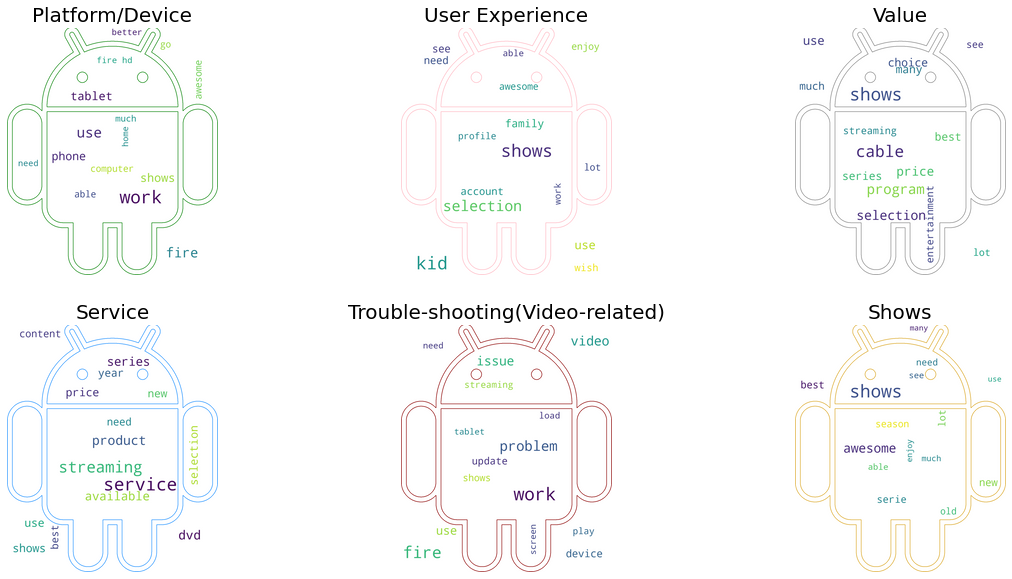

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
ax[0,0].set_title('Platform/Device', fontsize=20); ax[0,0].imshow(create_wordcloud('images/android.png', 0), interpolation='spline36'); ax[0,0].axis("off")
ax[0,1].set_title('User Experience', fontsize=20); ax[0,1].imshow(create_wordcloud('images/family.png', 1,contour_color='lightpink'), interpolation='spline36'); ax[0,1].axis("off")
ax[0,2].set_title('Value', fontsize=20); ax[0,2].imshow(create_wordcloud('images/think.png', 2,contour_color='gray'), interpolation='spline36'); ax[0,2].axis("off")
ax[1,0].set_title('Service', fontsize=20); ax[1,0].imshow(create_wordcloud('images/service.png', 3,contour_color='dodgerblue'), interpolation='spline36'); ax[1,0].axis("off")
ax[1,1].set_title('Trouble-shooting(Video-related)', fontsize=20); ax[1,1].imshow(create_wordcloud('images/problem.png', 4,contour_color='darkred'), interpolation='spline36'); ax[1,1].axis("off")
ax[1,2].set_title('Shows', fontsize=20); ax[1,2].imshow(create_wordcloud('images/show.png', 5,contour_color='goldenrod'), interpolation='spline36'); ax[1,2].axis("off");

plt.savefig('images/{}'.format("bert_wordcloud"), dpi=200, transparent=True, bbox_inches = "tight")

#### Keywords and frequencies stored in a list of dictionaries "frequencies_topics"

In [ ]:
UPPER = 10
stop_words = set(stopwords.words('english')) | {'<','>',"'",'-','/',',','!','.','br','&',';','?',')','#','##s','##ing','le','ha','wa',
                                            'would','great','watch','stars','netflix','app','like','tv','five','good','love','one',
                                            'shows','time','kind','movie','movies','##le','watching','want','get','really','could','four', 'also', 'to', 'it', 'even'}
# Removed words that appeared in all or most topics

frequencies_topics = [0]*6
for topic_id in range(6):
    frequencies = defaultdict(int)
    for review in reviews_df.loc[reviews_df.pred == topic_id, 'review']:
        for word in tokenizer.tokenize(review):
            if word not in stop_words:
                frequencies[word] += 1
    keys = list(frequencies.keys())
    frequent_indices = np.argsort(list(frequencies.values()))[::-1][:UPPER]
    frequent_words = set(np.array(keys)[frequent_indices])
    frequencies_topics[topic_id] = frequent_words
    
    print(f"Topic: {topic_dict[topic_id]}")
    print(frequent_words,'\n')

Topic: Platform/Device
{'tablet', 'works', 'work', 'well', 'easy', 'use', 'hd', 'go', 'fire', 'phone'} 

Topic: User Experience
{'easy', 'see', 'new', 'use', 'selection', 'wish', 'awesome', 'family', 'kids', 'account'} 

Topic: Value
{'series', 'many', 'best', 'use', 'selection', 'programs', 'choices', 'price', 'cable', 'much'} 

Topic: Service
{'series', 'new', 'use', 'amazon', 'streaming', 'available', 'dvd', 'service', 'product', '34'} 

Topic: Trouble-shooting
{'fix', 'works', 'work', 'hd', 'video', 'use', 'amazon', 'fire', 'problem', 'update'} 

Topic: Shows
{'series', 'easy', 'new', 'best', 'use', 'see', 'show', 'awesome', 'able', 'old'} 



### TSNE 3d plot

In [ ]:
# # !pip uninstall umap
# !pip uninstall umap-learn
!pip install umap-learn

     |████████████████████████████████| 80 kB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 40.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=b2f9438e7bc06aeea549313968e111c8ef0f82a3f80b58d206de40088289a4bd
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52372 sha256=3862d47f6e29b901a52924bfca20deb3340d9e553431c39ddebd7f8be88aec4d
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [ ]:
import umap

In [ ]:
%time mapper3d = umap.UMAP(n_components=3, n_neighbors=7, random_state=0).fit(preprocessed_X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


CPU times: user 32.9 s, sys: 0 ns, total: 32.9 s
Wall time: 32.1 s


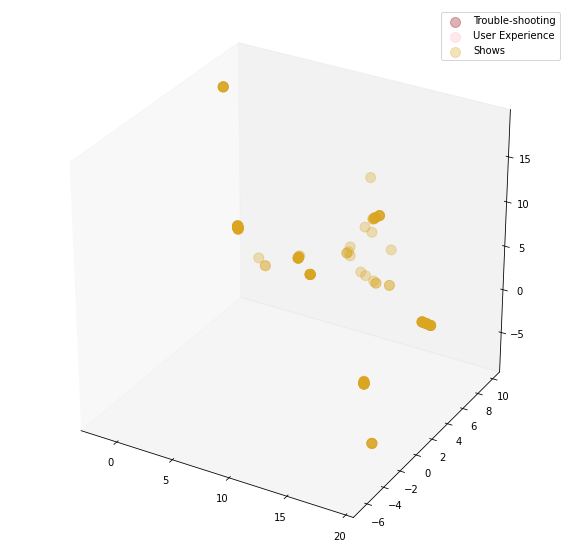

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
coords = mapper3d.embedding_
x,y,z = coords[major_docs,0], coords[major_docs,1], coords[major_docs,2]
colors = ['green', 'lightpink', 'gray', 'dodgerblue', 'darkred', 'goldenrod']
for label in [4, 1, 5]:
    mask = np.array(BERT_preds)[major_docs] == label
    ax.scatter3D(x[mask],y[mask],z[mask], c=colors[label], label=topic_dict[label], alpha=.3, marker = 'o', s=100)

# for label in [0, 2, 3]:
#     mask = np.array(BERT_preds)[major_docs] == label
#     ax.scatter3D(x[mask], y[mask], z[mask], facecolor=(1,1,1,0), edgecolor=colors[label],alpha=.5, label=topic_dict[label], marker = '.', s=100)
ax.grid(False)
ax.legend();

### TSNE 2d plot

In [ ]:
%time mapper2d = umap.UMAP(n_components=2, n_neighbors=9, random_state=0).fit(preprocessed_X)

CPU times: user 17.4 s, sys: 0 ns, total: 17.4 s
Wall time: 16.6 s


In [ ]:
coords = mapper2d.embedding_
x,y = coords[major_docs,0], coords[major_docs,1]

In [ ]:
topics_to_plot = [1,4,5]
indices = np.arange(len(preprocessed_X))[np.array([True if label in topics_to_plot else False for label in BERT_preds])]
major_docs_indices = list(set(major_docs).intersection(set(indices)))

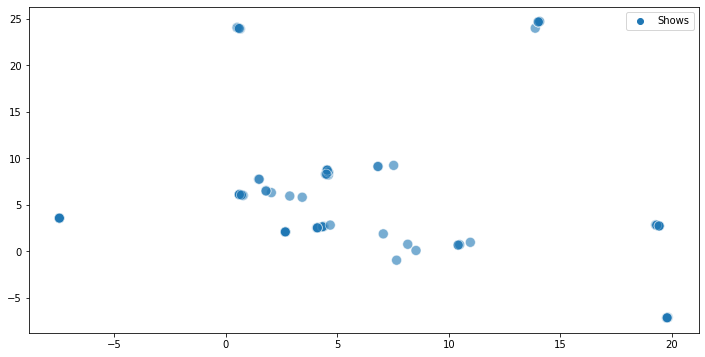

In [ ]:
coords = mapper2d.embedding_
# indices = predicted_proba.argmax(axis=0)
x_coords, y_coords = coords[major_docs_indices,0], coords[major_docs_indices,1]
plt.figure(figsize=(12, 6))
# plt.scatter(x_coords, y_coords, marker='.', alpha=0.8, c=np.array(predicted_topics)[major_docs], cmap='viridis', hue = )
# plt.legend();
sns.scatterplot(x=x_coords, y=y_coords, hue=[topic_dict[topic_id] for topic_id in np.array(BERT_preds)[major_docs_indices]], alpha=0.6, s=100, marker='o')
plt.show()
# for label, x, y in zip(['Platform/Device', 'User', 'Value', 'Service', 'Trouble-shooting', 'Shows'], x_coords, y_coords):
#     plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points');

### BERT word embeddings 2d visualization with UMAP

In [ ]:
# !pip install bert-embedding

     |████████████████████████████████| 209 kB 11.7 MB/s 
     |████████████████████████████████| 13.8 MB 140 kB/s 
     |████████████████████████████████| 29.6 MB 35 kB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-py3-none-any.whl size=259930 sha256=d0f17a9bc8713f87ce958920929be8387022a1599c45e04c7dd3c6a4de36b038
  Stored in directory: /root/.cache/pip/wheels/a6/41/8f/45bd1c58055d87aee5a71b6756a427ea8d92e506b3a9d17370
Successfully built gluonnlp
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires numpy>=1.17, but you have

In [ ]:
from bert_embedding import BertEmbedding

In [ ]:
# embeddings = pd.read_pickle('bert_model/embeddings.pkl')
bert_embedding = BertEmbedding()
%time embeddings = bert_embedding(reviews)

Vocab file is not found. Downloading.
CPU times: user 13min 44s, sys: 7.7 s, total: 13min 52s
Wall time: 13min 47s


In [ ]:
pd.to_pickle(embeddings, 'bert_model/embeddings.pkl')

In [ ]:
BERT = pd.concat([pd.Series(BERT_preds), pd.Series(BERT_proba.max(axis=1))],axis=1)
BERT.columns = ['label', 'proba']

representative_docs, representative_docs_umap, tokens_per_doc = [], [], []

token_stopwords = set(stopwords.words('english')) | {"'",'.', ",", "would", "goes", "2", '-', 'five', 'stars'}
tsne = TSNE(n_components=2, random_state = 0)

for i in range(6):
    BERT_ = BERT.loc[BERT.label==i,:]
    representative_docs.append(BERT_.index[np.argmax(BERT_.proba)])# Most representative documents per topic
    tokens, embeds = embeddings[representative_docs[i]][0], embeddings[representative_docs[i]][1]
    indices = [i for (i, token) in enumerate(np.array(tokens)) if token not in token_stopwords]# Remove the stopwords from each topic
    clean_tokens = [tokens[i] for i in indices]
    
    tokens_per_doc.append(clean_tokens)    
    try:# Try UMAP first, and if it throws an error, try TSNE
        mapper2d = umap.UMAP(n_components=2, n_neighbors=2, random_state=1).fit(np.array([embeds[i] for i in indices]))
        representative_docs_umap.append(mapper2d.embedding_)
    except:
        representative_docs_umap.append(tsne.fit_transform(np.array([embeds[i] for i in indices])))

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
/usr/local/lib/python3.7/dist-packages/umap/umap_.py:133: UserWarning: A large number of your vertices were disconnected from the manifold.
Disconnection_distance = inf has removed 0 edges.
It has fully disconnected 2 vertices.
You might consider using find_disconnected_points() to find and remove these points from your data.
Use umap.utils.disconnected_vertices() to identify them.
  f"A large number of your vertices were disconnected from the manifold.\n"


In [ ]:
# !pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7095 sha256=d641caac5dcdaecfe175ca1241d2a6492864a4a8f553094c375d2fb6fdd04c07
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [ ]:
from adjustText import adjust_text

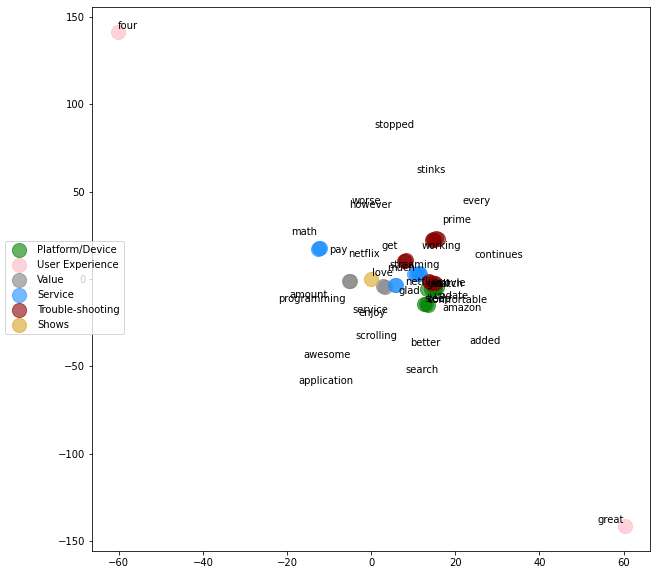

In [ ]:
ax = plt.figure(figsize=(10,10))
colors = ['green', 'lightpink', 'gray', 'dodgerblue', 'darkred', 'goldenrod']
for label in range(6):
    word_embeddings = representative_docs_umap[label]
    tokens = tokens_per_doc[label]
    x, y = word_embeddings[:, 0], word_embeddings[:, 1]
    plt.scatter(x, y, c=colors[label], label=topic_dict[label], alpha=0.6, marker = 'o', s=200);
    texts = [plt.text(x[i], y[i], tokens[i], ha='center', va='center') for i in range(len(x))]
    adjust_text(texts, avoid_points = False, expand_text = (1.05, 4.5))
ax.legend(loc=6)
ax.savefig('images/{}'.format("bert_cluster"), dpi=200, transparent=True, bbox_inches = "tight");